# Chapter 4: Training Models

## Linear Regression

The goal of a linear regression model is given a training set $\mathbf{X}$ of <i>n</i>-dimensional input vectors
$\mathbf{x}^{(i)}$, we want to find an <i>n</i>-dimensional vector $\theta$ that minimizes

$ MSE\,(\mathbf{X}, h_{\theta}) =
\large{\frac{1}{n}}\sum\limits_{i=1}^n \left( \theta^T \cdot \mathbf{x}^{(i)} - y^{(i)} \right)^2 $

where $MSE$ is the mean squared error of the training set.

### The Normal Equation

One way to find $\theta$ is to use the <i>normal equation</i>:

$\hat{\theta} = \left( \mathbf{X}^T \cdot \mathbf{X} \right)^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y}$.

The example below illustrates how this can equation can be used to train a linear regression model.

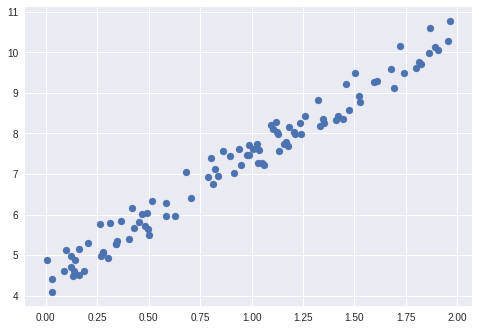

In [0]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

plt.scatter(X, y)
plt.show()

In [4]:
# Computing theta using the np.linalg module. It is not quite (4, 3) as we might
# expect due to the noise.

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.42475927]
 [3.02723605]]


In [5]:
# Making a prediction using the computed values of theta.

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.42475927],
       [10.47923138]])

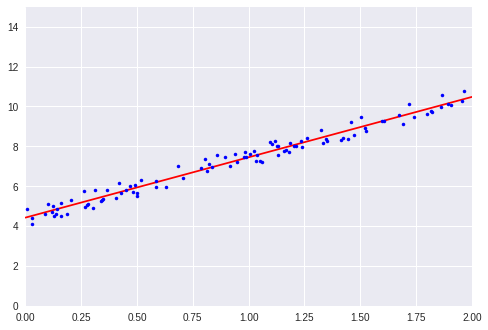

In [6]:
# Plot the model's prediction.

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
# Equivalent scikit-learn code, we see that we get the same results
# as when we use the normal equation.

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.42475927] [[3.02723605]]
[[ 4.42475927]
 [10.47923138]]


### Computational Complexity

The normal equation computes the inverse of $\mathbf{X}^T \cdot \mathbf{X}$, which is an $O(n^3)$ operation. This does not scale well for large datasets.

## Gradient Descent

### Batch Gradient Descent

Gradient descent is the process of tweaking parameters slightly until a global minimum is found in the target space
of the cost function.

In the case of linear regression, the partial derivative of each parameter in $\theta$ is

$ \large{\frac{\partial}{\partial\theta_j}}\;MSE\,(\theta) =
\large{\frac{2}{m}} \sum\limits_{i=1}^n \left( \theta^T\cdot\mathbf{x}^{(i)} \right) x^{(i)}_j. $

The gradient of the cost function is given by

$ \nabla_{\theta}\;MSE\,(\theta) = \large{\frac{2}{n}} \mathbf{X}^T \cdot (\mathbf{X} \cdot \theta - y). $

The gradient vector points in the direction of most change in the positive direction, so one iteration of
gradient descent is computed as

$ \theta^{(\text{next step})} = \theta - \eta \, \nabla_{\theta}\;MSE\,(\theta) $\

where $\eta$ is the <i>learning rate</i> of the algorithm.

In [8]:
# An implmentation of gradient descent. As we can see the result is the same as when
# we used the normal equation.

eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for _ in range(n_iterations):
    gradients = (2 / m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - (eta * gradients)
    
print(theta)

[[4.42475927]
 [3.02723605]]


### Stochastic Gradient Descent

Batch gradient descent can be inefficient since it uses all values in the training set at each step to compute
the gradient, thereby making it an $O(n^2)$ operation. It also has trouble escaping from global minima.

An alternative is stochastic gradient descent, which picks a single point randomly and computes the gradient using
that one point.